In [1]:
# imports...
import pandas as pd
import numpy as np
import os
from scipy import stats
# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")
# acquire
from env import host, user, password
from pydataset import data
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# my fancy docs
import acquire
import prepare
import explore

## Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
# positive: survives
# negative: dies
# TP: predict survival, and the passenger actually survived
# TN: predict death, and passenger actually died
# FN: predict death, but passenger actually survived
# FP: predict survival, but passenger actually died

In [3]:
# lets bring in the data set
# titanic_df = acquire.new_titanic_data()
# now let's prep it
train, validate, test = prepare.prep_titanic_data(acquire.new_titanic_data(), column = 'age', method = 'median', dummies = ['embarked', 'sex'])
# split it
# train, validate, test = prepare.titanic_split(titanic_df)
# what do they look like?
train.shape, validate.shape, test.shape

((498, 11), (214, 11), (179, 11))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  498 non-null    int64  
 1   survived      498 non-null    int64  
 2   pclass        498 non-null    int64  
 3   age           498 non-null    float64
 4   sibsp         498 non-null    int64  
 5   parch         498 non-null    int64  
 6   fare          498 non-null    float64
 7   alone         498 non-null    int64  
 8   embarked_Q    498 non-null    uint8  
 9   embarked_S    498 non-null    uint8  
 10  sex_male      498 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 36.5 KB


In [37]:
train.parch.value_counts()

0    385
1     65
2     40
3      4
5      3
4      1
Name: parch, dtype: int64

In [35]:
# i want to see relationships between each column and 'survived'
# 'pclass' - chi2

observed1 = pd.crosstab(train.survived, train.pclass)
chi2, p, degf, expected = stats.chi2_contingency(observed1)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 55.2252
p     = 0.0000


In [36]:
# i want to see relationships between each column and 'survived'
# 'sibsp' - chi2

observed2 = pd.crosstab(train.survived, train.sibsp)
chi2, p, degf, expected = stats.chi2_contingency(observed2)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 24.8926
p     = 0.0004


In [44]:
# i want to see relationships between each column and 'survived'
# 'sibsp' - chi2

observed2 = pd.crosstab(train.survived, train.sibsp)
chi2, p, degf, expected = stats.chi2_contingency(observed2)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 24.8926
p     = 0.0004


In [38]:
# i want to see relationships between each column and 'survived'
# 'parch' - chi2

observed3 = pd.crosstab(train.survived, train.parch)
chi2, p, degf, expected = stats.chi2_contingency(observed3)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 15.4412
p     = 0.0086


In [39]:
# i want to see relationships between each column and 'survived'
# 'alone' - chi2

observed4 = pd.crosstab(train.survived, train.alone)
chi2, p, degf, expected = stats.chi2_contingency(observed4)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 18.1920
p     = 0.0000


In [40]:
# i want to see relationships between each column and 'survived'
# 'embarked_Q' - chi2

observed5 = pd.crosstab(train.survived, train.embarked_Q)
chi2, p, degf, expected = stats.chi2_contingency(observed5)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 0.3542
p     = 0.5517


In [41]:
# i want to see relationships between each column and 'survived'
# 'embarked_S' - chi2

observed6 = pd.crosstab(train.survived, train.embarked_S)
chi2, p, degf, expected = stats.chi2_contingency(observed6)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 12.3251
p     = 0.0004


In [42]:
# i want to see relationships between each column and 'survived'
# 'sex_male' - chi2

observed7 = pd.crosstab(train.survived, train.sex_male)
chi2, p, degf, expected = stats.chi2_contingency(observed7)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 159.2890
p     = 0.0000


In [46]:
# now the continuous...
# 'age'
# 'fare'

# create survival_rate
survival_rate = train['survived'].mean()
survival_rate

0.38353413654618473

In [47]:
# create age variable for ttest
age = train['age']

583    36.0
165     9.0
50      7.0
259    50.0
306    28.0
Name: age, dtype: float64

In [49]:
# ttest for age
alpha = 0.01
t, p = stats.ttest_1samp(age, survival_rate)
t, p/2, alpha

(49.391473076033655, 3.8085496775045816e-194, 0.01)

In [50]:
# create fare variable for ttest
fare = train['fare']

In [51]:
# ttest for fare
alpha = 0.01
t, p = stats.ttest_1samp(fare, survival_rate)
t, p/2, alpha

(14.548430746098049, 1.6753909571183626e-40, 0.01)

In [52]:
# so which columns do I want to keep for my model?????
# 'sex_male', 'pclass', 'age', 'sibsp'
# and maybe 'alone'

In [5]:
# getting ready to test our models...
X_train, y_train = train.drop(columns='survived'), train.survived
X_validate, y_validate = validate.drop(columns='survived'), validate.survived
X_test, y_test = test.drop(columns='survived'), test.survived

In [6]:
# X_train is the DF w/o the 'survived' column
# y_train is the 'survived' column as a Series

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [7]:
# what is the mode of 'survived'?
y_train.value_counts()
# death wins

0    307
1    191
Name: survived, dtype: int64

In [8]:
# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
# how does it do on training data set?
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.6165


2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [12]:
# let's look w/ default hyperparameters
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# how does the DT perform w/ default hyperparameters?
print(f'training score: {tree1.score(X_train, y_train):.2%}')
print(f'validate score: {tree1.score(X_validate, y_validate):.2%}')

training score: 99.40%
validate score: 78.97%


In [11]:
# what does the tree look like?
print(export_text(tree, feature_names=X_train.columns.tolist(), show_weights=True))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- age <= 3.00
|   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |--- age >  3.00
|   |   |   |--- passenger_id <= 205.00
|   |   |   |   |--- passenger_id <= 197.00
|   |   |   |   |   |--- age <= 24.50
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- age >  24.50
|   |   |   |   |   |   |--- age <= 27.50
|   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |--- age >  27.50
|   |   |   |   |   |   |   |--- age <= 47.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |   |   |   |   |   |--- age >  47.00
|   |   |   |   |   |   |   |   |--- age <= 52.50
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- age >  52.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |--- passenger_id >  197.00
|   |   |   |   |   |--- weights: [1.00,

[Text(239.51971153846156, 473.95125, 'X[9] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(102.05408653846155, 443.37375000000003, 'X[1] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(23.60769230769231, 412.79625, 'X[2] <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(15.73846153846154, 382.21875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(31.47692307692308, 382.21875, 'X[0] <= 205.0\ngini = 0.062\nsamples = 93\nvalue = [3, 90]'),
 Text(23.60769230769231, 351.64125, 'X[0] <= 197.0\ngini = 0.305\nsamples = 16\nvalue = [3, 13]'),
 Text(15.73846153846154, 321.06375, 'X[2] <= 24.5\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(7.86923076923077, 290.48625000000004, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(23.60769230769231, 290.48625000000004, 'X[2] <= 27.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(15.73846153846154, 259.90875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(31.47692307692308, 259.90875, 'X[0] 

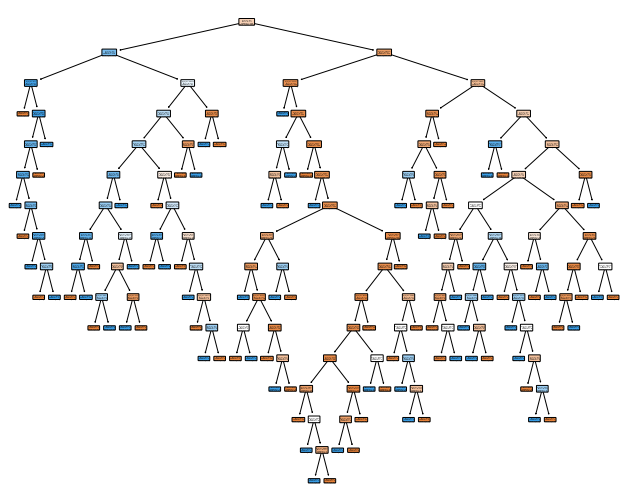

In [19]:
# this is garbage

plot_tree(tree, filled=True, rounded=True)

In [13]:
# now let's dive in and take a close look once 

X_cols = ['pclass','age', 'sibsp', 'parch', 'fare', 'alone', 'embarked_Q', 'embarked_S', 'sex_male']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [27]:
tree1 = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=12)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=12)

In [28]:
print(f'training score: {tree1.score(X_train, y_train):.2%}')
print(f'validate score: {tree1.score(X_validate, y_validate):.2%}')

training score: 83.53%
validate score: 79.44%


[Text(277.6714285714286, 440.31600000000003, 'X[8] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(131.52857142857144, 342.468, 'X[0] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(58.45714285714286, 244.62, 'X[1] <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(29.22857142857143, 146.772, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(87.6857142857143, 146.772, 'gini = 0.062\nsamples = 93\nvalue = [3, 90]'),
 Text(204.60000000000002, 244.62, 'X[4] <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]'),
 Text(146.14285714285717, 146.772, 'X[1] <= 35.0\ngini = 0.476\nsamples = 69\nvalue = [27, 42]'),
 Text(116.91428571428573, 48.924000000000035, 'gini = 0.455\nsamples = 63\nvalue = [22, 41]'),
 Text(175.3714285714286, 48.924000000000035, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(263.0571428571429, 146.772, 'X[3] <= 4.0\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(233.82857142857145, 48.924000000000035, 'gini = 0.0\ns

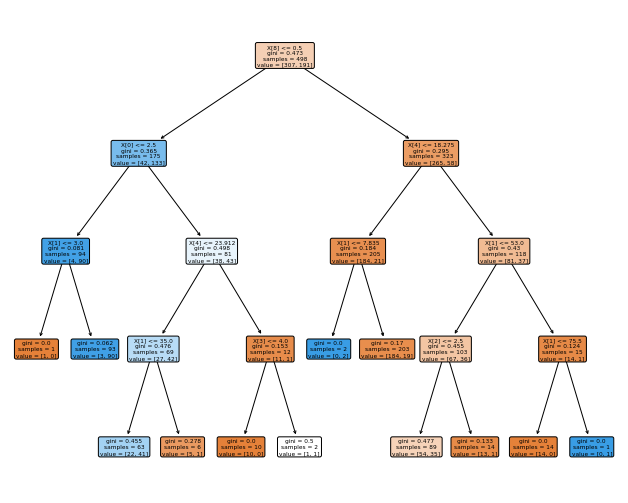

In [29]:
plot_tree(tree1, filled=True, rounded=True)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?